<div style="text-align:center;">
  <span style="color:#962323; font-size:45px; font-weight:bold; font-family:Arial;">Kmeans from scratch</span>
</div>

### <span style="color:#800080; font-style:italic; font-family:Arial;">General import</span>

In [10]:
import imageio

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.cluster import KMeans

# Load iris data
iris = datasets.load_iris()
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)

### <span style="color:#800080; font-style:italic; font-family:Arial;">Already coded</span>


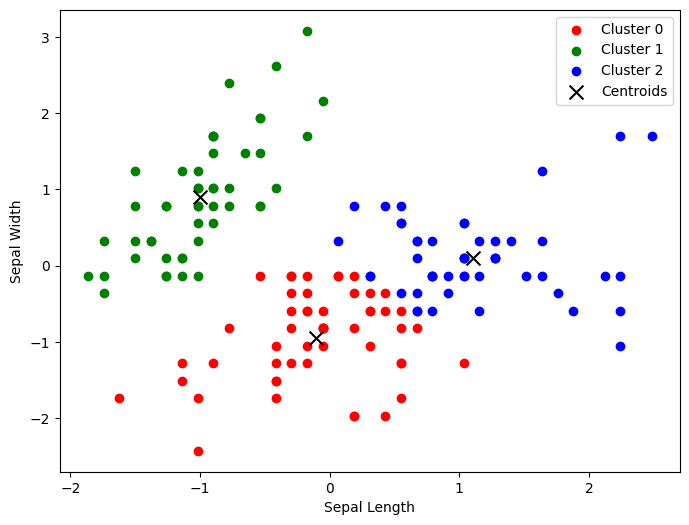

In [14]:
# Standardize the data
df_iris = (df_iris - df_iris.mean()) / df_iris.std(axis=0)

# Kmeans clustering
kmeans = KMeans(n_clusters=3, random_state=0).fit(df_iris)
centroids = kmeans.cluster_centers_
df_iris['cluster'] = kmeans.labels_

# Plot the clusters
fig, ax = plt.subplots(figsize=(8, 6))
colors = ['red', 'green', 'blue']
for i in range(3):
    df = df_iris[df_iris['cluster'] == i]
    ax.scatter(df['sepal length (cm)'], df['sepal width (cm)'], c=colors[i], label=f'Cluster {i}')
ax.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='x', s=100, label='Centroids')
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.legend()

### <span style="color:#800080; font-style:italic; font-family:Arial;">From scratch</span>


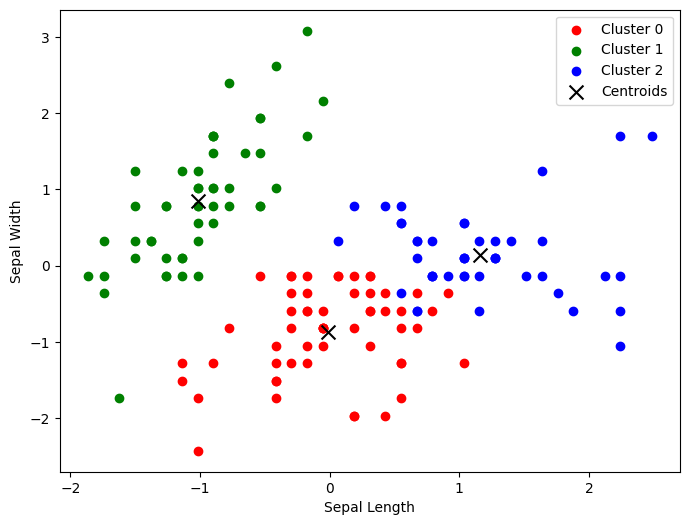

In [15]:
# Kmeans from scratch
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

def get_centroids(X, clusters, k):
    centroids = np.zeros((k, X.shape[1]))
    for i in range(k):
        cluster = X[clusters == i]
        centroids[i] = np.mean(cluster, axis=0)
    return centroids

def kmeans(X, k, max_iters=100):
    n_samples, _ = X.shape
    clusters = np.zeros(n_samples)
    centroids = X[np.random.choice(n_samples, k, replace=False)]
    for _ in range(max_iters):
        for i, sample in enumerate(X):
            distances = [euclidean_distance(sample, centroid) for centroid in centroids]
            clusters[i] = np.argmin(distances)
        prev_centroids = centroids.copy()
        centroids = get_centroids(X, clusters, k)
        if np.all(prev_centroids == centroids):
            break
    return clusters, centroids

clusters, centroids = kmeans(df_iris.values[:, :-1], 3)
df_iris['cluster'] = clusters

# Plot the clusters
fig, ax = plt.subplots(figsize=(8, 6))
colors = ['red', 'green', 'blue']
for i in range(3):
    df = df_iris[df_iris['cluster'] == i]
    ax.scatter(df['sepal length (cm)'], df['sepal width (cm)'], c=colors[i], label=f'Cluster {i}')
ax.scatter(centroids[:, 0], centroids[:, 1], c='black', marker='x', s=100, label='Centroids')
ax.set_xlabel('Sepal Length')
ax.set_ylabel('Sepal Width')
ax.legend()